In [2]:
import pandas as pd
data = pd.read_csv(r"C:\Users\User\Downloads\clean_weather.csv", index_col=0)
# Fill in any missing values in the data with past values
data = data.ffill()

print(data.head(5))

            tmax  tmin  rain  tmax_tomorrow
1970-01-01  60.0  35.0   0.0           52.0
1970-01-02  52.0  39.0   0.0           52.0
1970-01-03  52.0  35.0   0.0           53.0
1970-01-04  53.0  36.0   0.0           52.0
1970-01-05  52.0  35.0   0.0           50.0


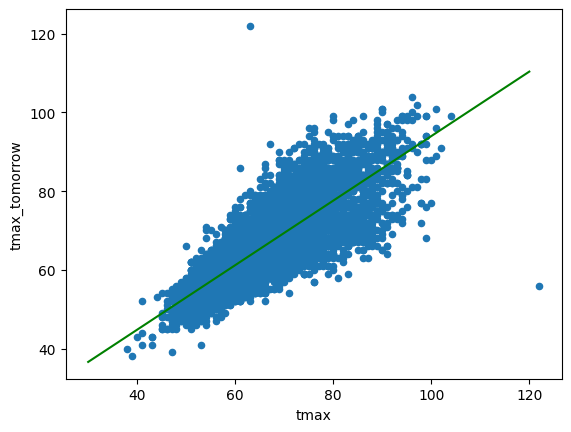

In [3]:
import matplotlib.pyplot as plt
# Create a scatter plot of tmax and tmax_tomorrow
data.plot.scatter("tmax", "tmax_tomorrow")

# Calculate the prediction given our weight and bias
prediction = lambda x, w1=.82, b=11.99: x * w1 + b

# Plot a linear regression line over our data
plt.plot([30, 120], [prediction(30),prediction(120)], 'green')


In [28]:
import numpy as np

def mse(actual, predicted):
    # Calculate mean squared error
    return np.mean((actual - predicted) ** 2)

# Error with the weight of .82 and the bias of 11.99
print(mse(data["tmax_tomorrow"], prediction(data["tmax"])))

# Error with a small shift in our weight, to .83, and in our bias, to 12
print(mse(data["tmax_tomorrow"], prediction(data["tmax"], .83, 11.99)))

22.897335324598416
23.474003804870822


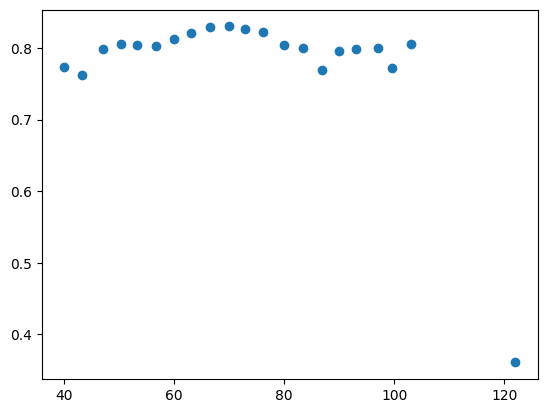

In [5]:
# Cut our tmax range into 25 bins
tmax_bins = pd.cut(data["tmax"], 25)

# Calculate the average ratio between tmax_tomorrow and tmax in each bin
ratios = (data["tmax_tomorrow"] - 11.99 )/ data["tmax"]
binned_ratio = ratios.groupby(tmax_bins, observed=False).mean()

# Calculate the average tmax in each bin
binned_tmax = data["tmax"].groupby(tmax_bins, observed=False).mean()

# Graph the tmax values versus the ratios
plt.scatter(binned_tmax, binned_ratio)

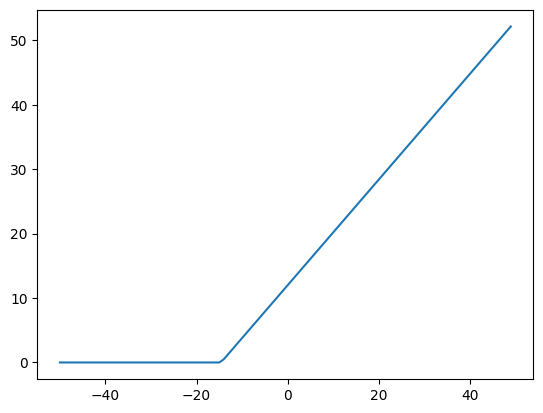

In [6]:
# Generate a range of predictions between -50 and 50.
temps = np.arange(-50,50)

# Predict tmax_tomorrow given each of our input temps
plt.plot(temps, np.maximum(0, prediction(temps)))

(0.0, 45.0)

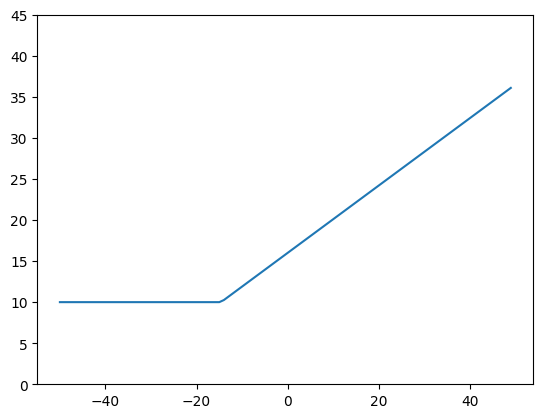

In [7]:
# Generate a range of predictions between -50 and 50.
temps = np.arange(-50,50)

# Predict tmax_tomorrow given each of our input temps
# Apply prediction twice to simulate 2 network layers
layer1 = np.maximum(0, prediction(temps))
layer2 = prediction(layer1, .5, 10)
plt.plot(temps, layer2)

# # Set the yaxis of the plot to start at 0
plt.ylim((0,45))

(0.0, 40.0)

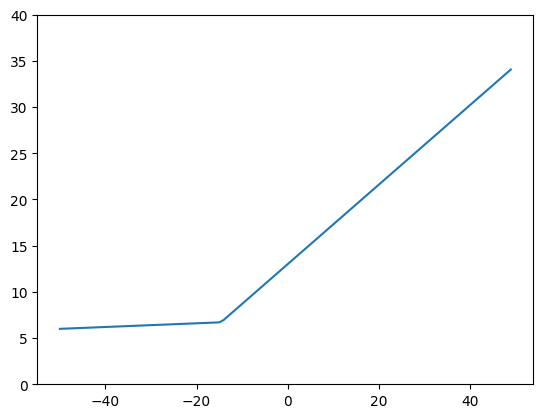

In [8]:
# Generate a range of predictions between -50 and 50.
temps = np.arange(-50,50)

# Predict tmax_tomorrow given each of our input temps
# Output from unit 1 of layer 1
layer1_unit1 = np.maximum(0, prediction(temps))
# Output from unit 2 of layer 1
layer1_unit2 = np.maximum(0, prediction(temps, .1, 10))
# Output from layer 2 - multiply the outputs of layer 1 unit 1 and layer 1 unit 2 by the respective weights, and add the bias
layer2 = prediction(layer1_unit1, .5, 0) + prediction(layer1_unit2, .2, 0) + 5
plt.plot(temps, layer2)

# Set the y axis of the plot to start at 0
plt.ylim((0,40))

CALCULATING LAYER OUTPUTS (MATRICES)

In [9]:
# Get 5 temperature values
input = np.array([[80], [90], [100], [-20], [-10]])

# Create the weight matrix, which is 1x2
l1_weights = np.array([[.82, .1]])

# Create the 1x2 bias matrix
l1_bias = np.array([[11.99, 10]])

l1_output = input @ l1_weights + l1_bias

l1_output

array([[77.59, 18.  ],
       [85.79, 19.  ],
       [93.99, 20.  ],
       [-4.41,  8.  ],
       [ 3.79,  9.  ]])

In [10]:
l1_activated = np.maximum(l1_output, 0)
l1_activated

array([[77.59, 18.  ],
       [85.79, 19.  ],
       [93.99, 20.  ],
       [ 0.  ,  8.  ],
       [ 3.79,  9.  ]])

In [17]:
l2_weights = np.array([[.5],[.2]])

l2_bias = np.array([[5]])

output = l1_activated @ l2_weights + l2_bias

output


array([[47.395],
       [51.695],
       [55.995],
       [ 6.6  ],
       [ 8.695]])

CALCULATING WEIGHTS AND BIAS

In [26]:
tmax = np.array([[80], [90], [100], [-20], [-10]])
tmax_tomorrow = np.array([[83], [89], [95], [-22], [-9]])

def mse(actual, predicted):
    return (actual - predicted) ** 2
mse(tmax_tomorrow, output)

array([[1267.716025],
       [1391.663025],
       [1521.390025],
       [ 817.96    ],
       [ 313.113025]])

In [19]:
def mse_grad(actual, predicted):
    return predicted - actual

mse_grad(tmax_tomorrow, output)

array([[-35.605],
       [-37.305],
       [-39.005],
       [ 28.6  ],
       [ 17.695]])

In [29]:
output_gradient = mse_grad(tmax_tomorrow, output)
l2_w_gradient =  l1_activated.T @ output_gradient

l2_w_gradient

array([[-9562.0038],
       [-1741.73  ]])

In [30]:
l2_b_gradient =  np.mean(output_gradient, axis=0)

l2_b_gradient

array([-13.124])

In [31]:
lr = 1e-5
l2_bias = l2_bias - l2_b_gradient * lr
# Update the weight values
l2_weights = l2_weights - l2_w_gradient * lr

l2_weights

array([[0.59562004],
       [0.2174173 ]])

In [32]:
  # Calculate the gradient on the output of layer 1
l1_activated_gradient = output_gradient @ l2_weights.T

l1_activated_gradient

array([[-21.20705145,  -7.74114297],
       [-22.21960552,  -8.11075238],
       [-23.23215958,  -8.48036179],
       [ 17.03473309,   6.21813478],
       [ 10.53949657,   3.84719912]])

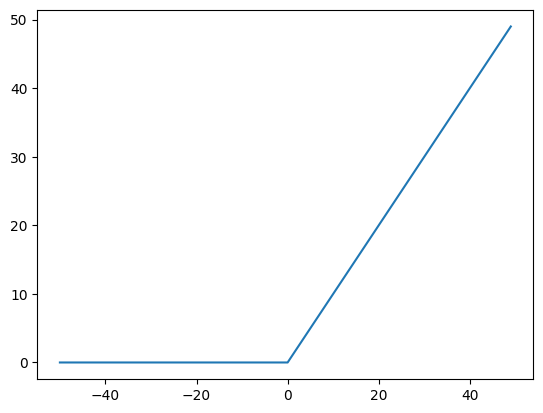

In [33]:
# Generate a range of predictions between -50 and 50.
temps = np.arange(-50,50)

# Predict tmax_tomorrow given each of our input temps
plt.plot(temps, np.maximum(0, temps))

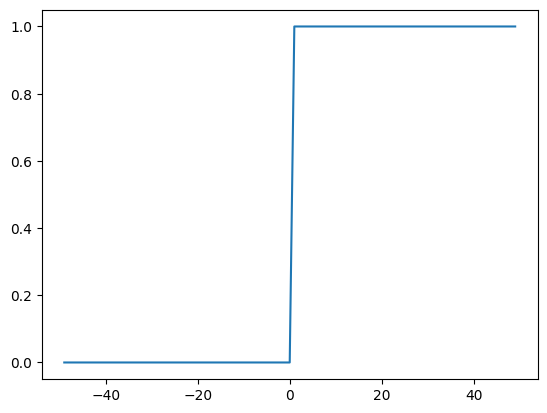

In [34]:
# Compute the relu function over the temperatures
activation = np.maximum(0, temps)

# Plot the input temperatures against the derivative of relu (the slope)
# np.roll will shift the values to the right one place, so we subtract the previous value
plt.plot(temps[1:], activation[1:] - np.roll(activation, 1)[1:])

In [35]:
l1_output_gradient = l1_activated_gradient * np.heaviside(l1_output, 0)

l1_output_gradient

array([[-21.20705145,  -7.74114297],
       [-22.21960552,  -8.11075238],
       [-23.23215958,  -8.48036179],
       [  0.        ,   6.21813478],
       [ 10.53949657,   3.84719912]])

In [38]:
l1_w_gradient =  input.T @ l1_output_gradient
l1_b_gradient = np.mean(l1_output_gradient, axis=0)

l1_weights -= l1_w_gradient * lr
l1_bias -= l1_b_gradient * lr
l1_weights

array([[1.00374819, 0.1708039 ]])

In [39]:
l1_bias

array([[11.99033672, 10.0000856 ]])

In [ ]:
import numpy as np
import StandardScaler
PREDICTORS = ["tmax", "tmin", "rain"]
TARGET = "tmax_tomorrow"

# Scale our data so relu works better
# All temperature values in the original dataset are over 0, so relu won't do much for several epochs
# Scaling will make some of the input data negative
scaler = StandardScaler()
data[PREDICTORS] = scaler.fit_transform(data[PREDICTORS])

split_data = np.split(data, [int(.7 * len(data)), int(.85 * len(data))])
(train_x, train_y), (valid_x, valid_y), (test_x, test_y) = [[d[PREDICTORS].to_numpy(), d[[TARGET]].to_numpy()] for d in
                                                            split_data]